# EDA

## EDA - 판매량 등급과 변수 상관성 비교

### 스타일샷 유무 - 기업에서 스타일 샷을 올렷는지 이걸 확인해야 할듯

C:\Users\82104\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46321 (\N{HANGUL SYLLABLE DEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82104\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44553 (\N{HANGUL SYLLABLE GEUB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


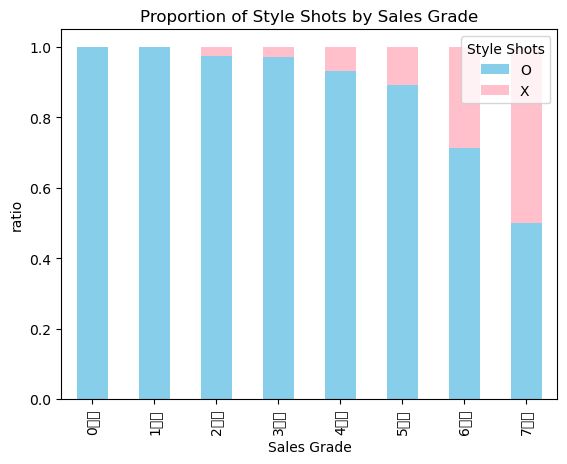

In [ ]:
count_df = df.groupby(['판매량등급', '스타일샷_유무']).size().unstack(fill_value=0)

# 비율 계산
ratio_df = count_df.div(count_df.sum(axis=1), axis=0)
ratio_df = ratio_df[[1, 0]]

# 비율로 그래프 설정
ax = ratio_df.plot(kind='bar', stacked=True, color = ['skyblue','pink'])

# y축을 비율로 설정
ax.set_ylabel('ratio')
ax.set_xlabel('Sales Grade')
ax.set_title('Proportion of Style Shots by Sales Grade')
ax.legend(title='Style Shots', labels=['O', 'X'])

plt.show()

### 메인 샷 사람 유무

C:\Users\82104\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46321 (\N{HANGUL SYLLABLE DEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82104\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44553 (\N{HANGUL SYLLABLE GEUB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


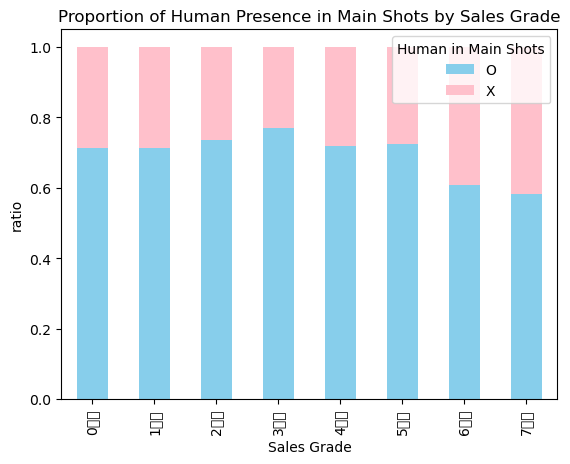

In [ ]:
count_df = df.groupby(['판매량등급', 'human_ditect']).size().unstack(fill_value=0)

# 비율 계산
ratio_df = count_df.div(count_df.sum(axis=1), axis=0)
ratio_df = ratio_df[[1, 0]]

# 비율로 그래프 설정
ax = ratio_df.plot(kind='bar', stacked=True, color = ['skyblue','pink'])

# y축을 비율로 설정
ax.set_ylabel('ratio')
ax.set_xlabel('Sales Grade')
ax.set_title('Proportion of Human Presence in Main Shots by Sales Grade')
ax.legend(title='Human in Main Shots', labels=['O', 'X'])

plt.show()

### 사이즈 수

In [ ]:
set(df['사이즈 수']) # 0,1 합치고, 6,7 합치는게 좋을 듯,,,,, 보기 힘들어

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0}

In [ ]:
def reclassify_size(size):
    if size <= 1:
        return '1'
    elif size == 2:
        return '2'
    elif size == 3:
        return '3'
    elif size == 4:
        return '4'
    elif size == 5:
        return '5'
    else:  # size >= 6
        return '6'

In [ ]:
df['Size_count'] = df['사이즈 수'].apply(reclassify_size)

C:\Users\82104\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46321 (\N{HANGUL SYLLABLE DEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82104\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44553 (\N{HANGUL SYLLABLE GEUB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


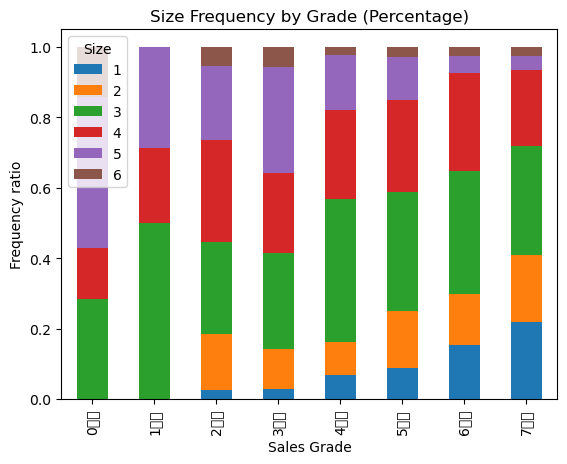

In [ ]:
import matplotlib.pyplot as plt

# 사이즈별 빈도를 계산
size_freq = df.groupby(['판매량등급', 'Size_count']).size().unstack(fill_value=0)

# 각 등급별 합계를 계산하여 비율로 변환
size_freq_percentage = size_freq.div(size_freq.sum(axis=1), axis=0)

# 누적 막대 그래프 그리기
size_freq_percentage.plot(kind='bar', stacked=True)
plt.title('Size Frequency by Grade (Percentage)')
plt.xlabel('Sales Grade')
plt.ylabel('Frequency ratio')
plt.legend(title='Size')
plt.show()

In [ ]:
# 여기서 어떤 인사이트를 얻을 수 있나 생각해봐